In [3]:
# import requests
# requests.packages.urllib3.disable_warnings()
# import ssl
#
# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     # Legacy Python that doesn't verify HTTPS certificates by default
#     pass
# else:
#     # Handle target environment that doesn't support HTTPS verification
#     ssl._create_default_https_context = _create_unverified_https_context

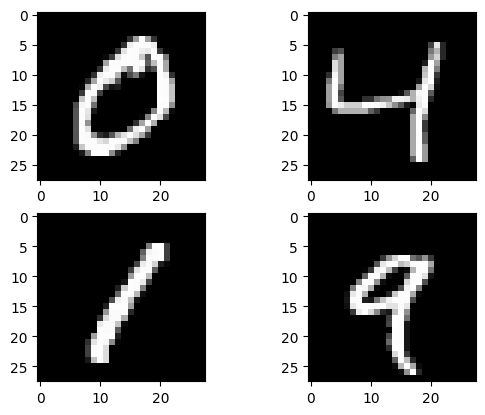

In [4]:
import numpy as np
from keras.datasets import mnist
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(x_mnist_train, y_mnist_train), (x_mnist_test, y_mnist_test) = mnist.load_data()

for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.imshow(x_mnist_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [5]:
print(x_mnist_train.shape)
print(y_mnist_train.shape)
print(x_mnist_test.shape)
print(y_mnist_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
from keras.src.utils import np_utils

x_mnist_train = x_mnist_train.reshape(x_mnist_train.shape[0], 28, 28, 1).astype('float32') / 255
x_mnist_test = x_mnist_test.reshape(x_mnist_test.shape[0], 28, 28, 1).astype('float32') / 255
y_mnist_train = np_utils.to_categorical(y_mnist_train)
y_mnist_test = np_utils.to_categorical(y_mnist_test)

print(x_mnist_train.shape)
print(y_mnist_train.shape)
print(x_mnist_test.shape)
print(y_mnist_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [7]:
epochs = 10
batch_size = 32
num_classes = 10

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.activations import relu
from keras.activations import softmax


def get_model():
    m = Sequential()

    m.add(Conv2D(16, (5, 5), activation=relu, input_shape=(28, 28, 1))),
    m.add(MaxPooling2D((2, 2))),
    m.add(Conv2D(32, (3, 3), activation=relu)),
    m.add(MaxPooling2D((2, 2))),
    m.add(Conv2D(64, (2, 2), activation=relu)),

    m.add(Flatten()),
    m.add(Dense(64, activation=relu)),
    m.add(Dense(num_classes, activation=softmax))

    m.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return m


model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          8256      
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
def draw(local_history, left_border):
    plt.subplots(nrows=2, ncols=1)
    plt.tight_layout(pad=5)
    draw_accuracy(local_history, left_border)
    draw_empirical_risk(local_history)


def draw_accuracy(local_history, left_border):
    plt.subplot(2, 1, 1)
    plt.title("accuracy")
    plt.plot(local_history.history['accuracy'], label='accuracy')
    plt.plot(local_history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([left_border, 1])
    plt.legend(['train_accuracy', 'val_accuracy'], loc='lower right')


def draw_empirical_risk(local_history):
    plt.subplot(2, 1, 2)
    plt.title('empirical risk')
    plt.plot(np.array(local_history.history['loss']))
    plt.xlabel('Epoch')
    plt.ylabel('Empirical risk')
    plt.legend(['train_risk'], loc='upper right')

In [10]:
history = model.fit(x_mnist_train, y_mnist_train, validation_data=(x_mnist_test, y_mnist_test), epochs=epochs,
                    batch_size=batch_size)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1559 - accuracy: 0.9526 - val_loss: 0.0469 - val_accuracy: 0.9838
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0500 - accuracy: 0.9845 - val_loss: 0.0292 - val_accuracy: 0.9903
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0369 - accuracy: 0.9887 - val_loss: 0.0349 - val_accuracy: 0.9891
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0266 - val_accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0233 - accuracy: 0.9929 - val_loss: 0.0315 - val_accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0200 - accuracy: 0.9934 - val_loss: 0.0245 - val_accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.0343 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 0.0297 - accuracy: 0.9921
loss:  0.02971774898469448
accuracy:  0.9921000003814697


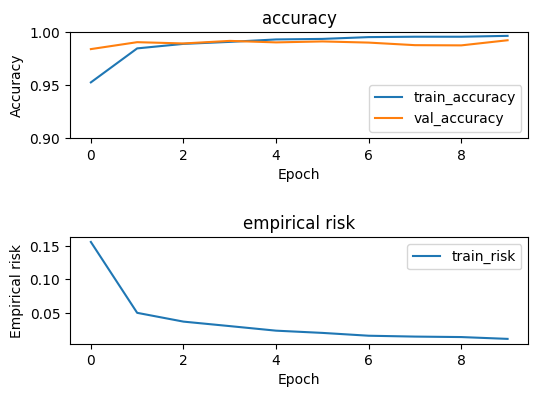

In [11]:
draw(history, 0.9)

test_loss, test_acc = model.evaluate(x_mnist_test, y_mnist_test)
print("loss: ", test_loss)
print("accuracy: ", test_acc)

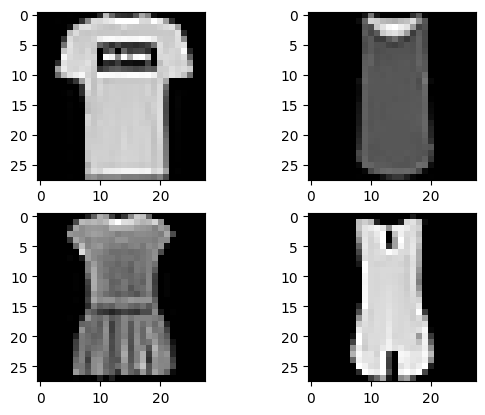

In [12]:
(x_fashion_mnist_train, y_fashion_mnist_train), (x_fashion_mnist_test, y_fashion_mnist_test) = fashion_mnist.load_data()

for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.imshow(x_fashion_mnist_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [13]:
print(x_fashion_mnist_train.shape)
print(y_fashion_mnist_train.shape)
print(x_fashion_mnist_test.shape)
print(y_fashion_mnist_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [14]:
x_fashion_mnist_train = x_fashion_mnist_train.reshape(x_fashion_mnist_train.shape[0], 28, 28, 1).astype('float32') / 255
x_fashion_mnist_test = x_fashion_mnist_test.reshape(x_fashion_mnist_test.shape[0], 28, 28, 1).astype('float32') / 255
y_fashion_mnist_train = np_utils.to_categorical(y_fashion_mnist_train)
y_fashion_mnist_test = np_utils.to_categorical(y_fashion_mnist_test)

print(x_fashion_mnist_train.shape)
print(y_fashion_mnist_train.shape)
print(x_fashion_mnist_test.shape)
print(y_fashion_mnist_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [15]:
fashion_model = get_model()

fashion_history = fashion_model.fit(x_fashion_mnist_train, y_fashion_mnist_train,
                            validation_data=(x_fashion_mnist_test, y_fashion_mnist_test), epochs=epochs,
                            batch_size=batch_size)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5060 - accuracy: 0.8150 - val_loss: 0.3829 - val_accuracy: 0.8621
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3364 - accuracy: 0.8763 - val_loss: 0.3414 - val_accuracy: 0.8731
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2904 - accuracy: 0.8928 - val_loss: 0.3003 - val_accuracy: 0.8939
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2596 - accuracy: 0.9043 - val_loss: 0.2814 - val_accuracy: 0.8959
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2391 - accuracy: 0.9110 - val_loss: 0.2749 - val_accuracy: 0.8994
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2180 - accuracy: 0.9174 - val_loss: 0.2654 - val_accuracy: 0.9032
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2034 - accuracy: 0.9241 - val_loss: 0.2744 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 0.2760 - accuracy: 0.9078
fashion loss:  0.2759527862071991
fashion accuracy:  0.907800018787384


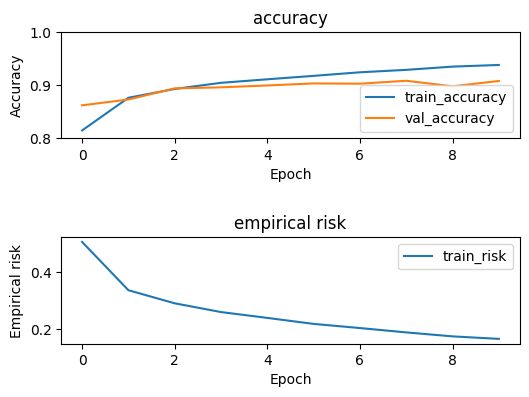

In [16]:
draw(fashion_history, 0.8)

test_loss, test_acc = fashion_model.evaluate(x_fashion_mnist_test, y_fashion_mnist_test)
print("fashion loss: ", test_loss)
print("fashion accuracy: ", test_acc)

In [17]:
model_v1 = get_model()
model_v1.set_weights(model.get_weights())

history_v1 = model_v1.fit(x_mnist_train, y_mnist_train,
                          validation_data=(x_mnist_test, y_mnist_test), epochs=epochs,
                          batch_size=batch_size)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.0308 - val_accuracy: 0.9905
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.0348 - val_accuracy: 0.9911
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0094 - accuracy: 0.9972 - val_loss: 0.0403 - val_accuracy: 0.9914
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.0382 - val_accuracy: 0.9908
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0069 - accuracy: 0.9976 - val_loss: 0.0422 - val_accuracy: 0.9910
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.0332 - val_accuracy: 0.9925
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.0452 - val_accura

In [18]:
model_v2 = get_model()
model_v2.set_weights(model.get_weights())
model_v2.trainable = False

history_v2 = model_v2.fit(x_mnist_train, y_mnist_train,
                          validation_data=(x_mnist_test, y_mnist_test), epochs=epochs,
                          batch_size=batch_size)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0110 - accuracy: 0.9964 - val_loss: 0.0342 - val_accuracy: 0.9922
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0086 - accuracy: 0.9972 - val_loss: 0.0353 - val_accuracy: 0.9904
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0086 - accuracy: 0.9972 - val_loss: 0.0427 - val_accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.0417 - val_accuracy: 0.9913
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0466 - val_accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.0454 - val_accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0069 - accuracy: 0.9975 - val_loss: 0.0553 - val_accurac

In [19]:
model_v3 = get_model()
model_v3.set_weights(model.get_weights())
model_v3.trainable = False

history_v3_before = model_v3.fit(x_mnist_train, y_mnist_train,
                                 validation_data=(x_mnist_test, y_mnist_test), epochs=epochs // 2,
                                 batch_size=batch_size)

model_v3.trainable = True

history_v3_after = model_v3.fit(x_mnist_train, y_mnist_train,
                                validation_data=(x_mnist_test, y_mnist_test),
                                epochs=epochs - epochs // 2, batch_size=batch_size)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0108 - accuracy: 0.9964 - val_loss: 0.0555 - val_accuracy: 0.9871
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0094 - accuracy: 0.9972 - val_loss: 0.0359 - val_accuracy: 0.9902
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0337 - val_accuracy: 0.9917
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0076 - accuracy: 0.9975 - val_loss: 0.0590 - val_accuracy: 0.9872
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0068 - accuracy: 0.9976 - val_loss: 0.0428 - val_accuracy: 0.9909
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0403 - val_accuracy: 0.9919
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.0456 - val_accuracy: 0.9914

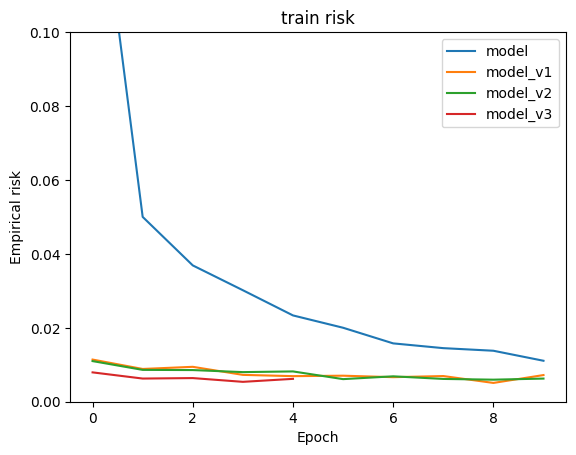

In [24]:
plt.title('train risk')
plt.plot(np.array(history.history['loss']))
plt.plot(np.array(history_v1.history['loss']))
plt.plot(np.array(history_v2.history['loss']))
plt.plot(np.array(history_v3_after.history['loss']))
plt.ylim(0, 0.1)
plt.xlabel('Epoch')
plt.ylabel('Empirical risk')
plt.legend(['model', 'model_v1', 'model_v2', 'model_v3'], loc='upper right')

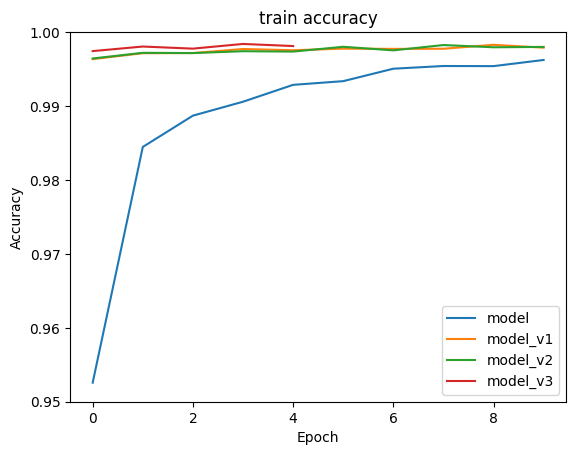

In [21]:
plt.title('train accuracy')
plt.plot(np.array(history.history['accuracy']))
plt.plot(np.array(history_v1.history['accuracy']))
plt.plot(np.array(history_v2.history['accuracy']))
plt.plot(np.array(history_v3_after.history['accuracy']))
plt.ylim([0.95, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['model', 'model_v1', 'model_v2', 'model_v3'], loc='lower right')

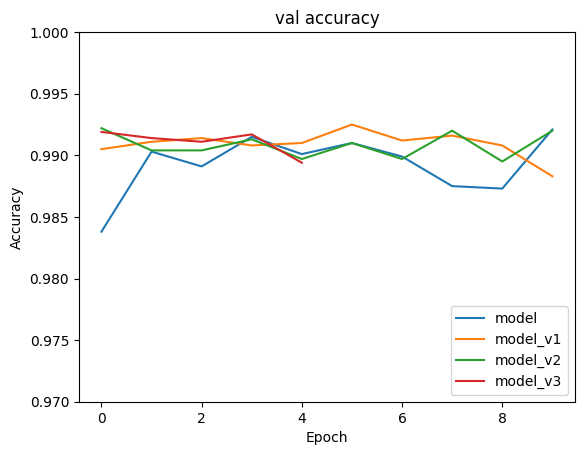

In [22]:
plt.title('val accuracy')
plt.plot(np.array(history.history['val_accuracy']))
plt.plot(np.array(history_v1.history['val_accuracy']))
plt.plot(np.array(history_v2.history['val_accuracy']))
plt.plot(np.array(history_v3_after.history['val_accuracy']))
plt.ylim([0.97, 1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['model', 'model_v1', 'model_v2', 'model_v3'], loc='lower right')